In [ ]:
pip install pdfkit


Linear Regression:
Columns available for visualization: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Please enter the columns you want to use for Linear Regression (separated by commas): total_bedrooms,total_rooms

KMeans Clustering:
Columns available for visualization: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Please enter the two columns you want to use for KMeans Clustering (separated by a comma): population,households

Decision Tree Analysis:
Columns available for visualization: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Please enter the columns you want to use for Decision Tree Analysis (separated by commas): housing_median_age,latitude
Report generated successfully.


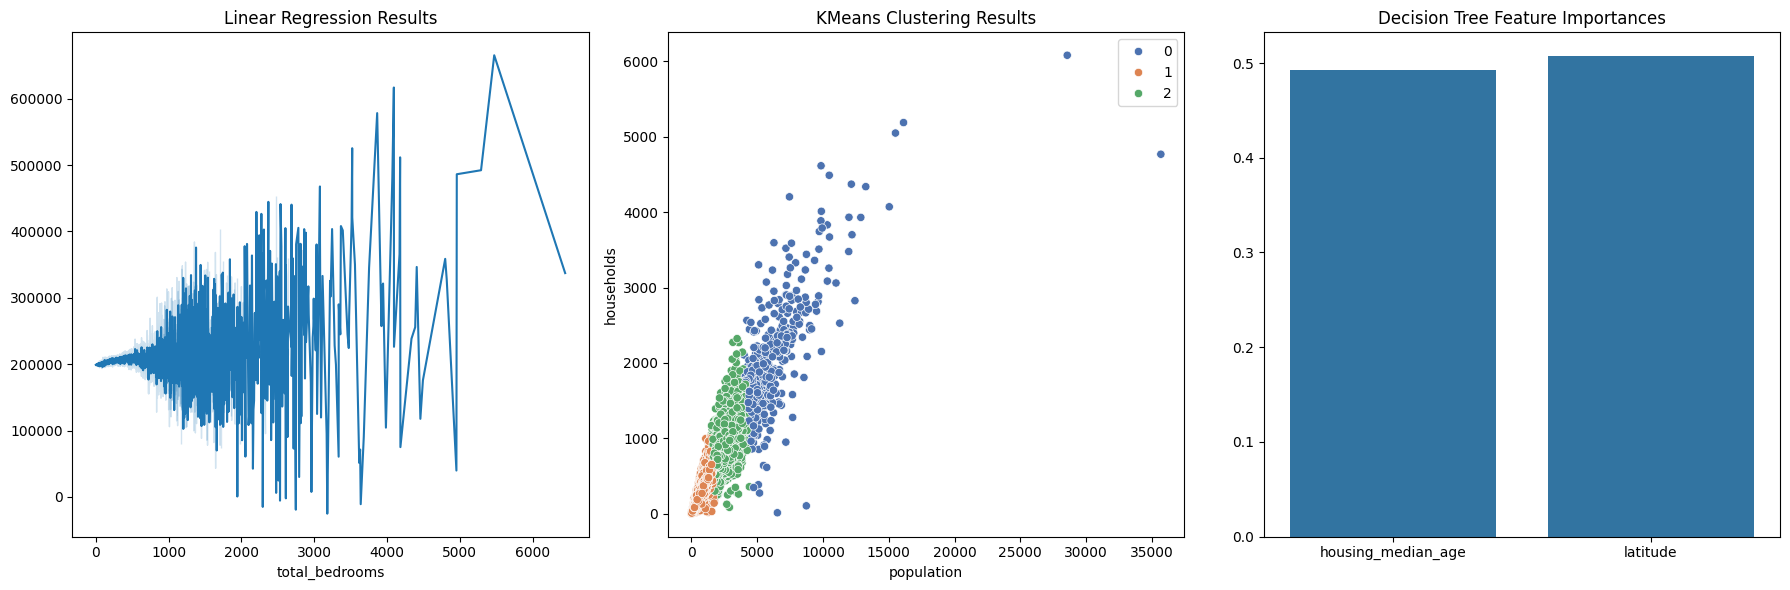

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Function to load the dataset based on file type
def load_data(file_path):
    if file_path.endswith('.csv'):
        return pd.read_csv(file_path)
    elif file_path.endswith('.xlsx') or file_path.endswith('.xls'):
        return pd.read_excel(file_path)
    elif file_path.endswith('.json'):
        return pd.read_json(file_path)
    else:
        raise ValueError("Unsupported file format. Please use CSV, Excel, or JSON files.")

# Example clean_data function (modify as needed)
def clean_data(df):
    df.dropna(inplace=True)
    return df

# Function to encode non-numeric columns
def encode_categorical(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Linear Regression Analysis
def linear_regression_analysis(df, target, selected_columns):
    X = df[selected_columns]
    y = df[target]
    model = LinearRegression()
    model.fit(X, y)
    return model

# KMeans Clustering
def kmeans_clustering(df, n_clusters, selected_columns):
    X = df[selected_columns]
    model = KMeans(n_clusters=n_clusters, n_init=10)
    model.fit(X)
    return model

# Decision Tree Analysis
def decision_tree_analysis(df, target, selected_columns):
    X = df[selected_columns]
    y = df[target]
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

# Updated generate_report function
def generate_report(df, target_column, linear_model, kmeans_model, tree_model, selected_columns_lr, selected_columns_km, selected_columns_dt):
    # Create visualizations
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # Linear Regression visualization
    sns.lineplot(x=df[selected_columns_lr[0]], y=linear_model.predict(df[selected_columns_lr]), ax=ax[0])
    ax[0].set_title('Linear Regression Results')

    # KMeans Clustering visualization
    sns.scatterplot(x=df[selected_columns_km[0]], y=df[selected_columns_km[1]], hue=kmeans_model.labels_, palette="deep", ax=ax[1])
    ax[1].set_title('KMeans Clustering Results')

    # Decision Tree visualization (using feature importances)
    importances = tree_model.feature_importances_
    sns.barplot(x=selected_columns_dt, y=importances, ax=ax[2])
    ax[2].set_title('Decision Tree Feature Importances')

    plt.tight_layout()
    plt.savefig('report_plots.png')

# Main function
def main(file):
    df = load_data(file)
    df = clean_data(df)

    # Encode non-numeric columns
    df, label_encoders = encode_categorical(df)

    # Identify the target column (assume it's the last column)
    target_column = df.columns[-1]

    # Let the user select columns for Linear Regression
    print("\nLinear Regression:")
    print("Columns available for visualization:", df.columns.tolist())
    selected_columns_lr = input("Please enter the columns you want to use for Linear Regression (separated by commas): ").split(",")

    # Let the user select columns for KMeans Clustering
    print("\nKMeans Clustering:")
    print("Columns available for visualization:", df.columns.tolist())
    selected_columns_km = input("Please enter the two columns you want to use for KMeans Clustering (separated by a comma): ").split(",")

    # Let the user select columns for Decision Tree Analysis
    print("\nDecision Tree Analysis:")
    print("Columns available for visualization:", df.columns.tolist())
    selected_columns_dt = input("Please enter the columns you want to use for Decision Tree Analysis (separated by commas): ").split(",")

    # Perform analyses
    linear_model = linear_regression_analysis(df, target_column, selected_columns_lr)
    kmeans_model = kmeans_clustering(df, n_clusters=3, selected_columns=selected_columns_km)
    tree_model = decision_tree_analysis(df, target_column, selected_columns_dt)

    # Generate the report
    generate_report(df, target_column, linear_model, kmeans_model, tree_model, selected_columns_lr, selected_columns_km, selected_columns_dt)
    print("Report generated successfully.")

# Simulate command-line argument passing in Jupyter Notebook
if __name__ == '__main__':
    main('/content/sample_data/california_housing_train.csv')  # Replace with your file path
